# Automobile Price Estimation - Using ML to Price Automobiles Based On Key Features (Python Code)

# Installing Libraries

In [1]:
#!pip install pandas
import pandas as pd

#!pip install numpy
import numpy as np

#!pip install matplotlib
import matplotlib.pyplot as plt

#!pip install seaborn
import seaborn as sns

#!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#!pip install statsmodels==0.12.1
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Import main data

main_data = pd.read_csv('Automobile Price Estimation - Using ML to price automobiles based on key features.csv', sep = ';')
display(main_data.head(), main_data.shape)

# To load data in console use command:
# python_dataframe_name = data_converter.convert_my_table_to_df('<table_name>')

,Make,Model,Year,Fuel_Type,HorsePower,Cylinders,Transmission_Type,Wheels_Driven,Number_of_Doors,Market_Segment,Vehicle_Size,Vehicle_Type,MPG_highway,MPG_City,Popularity,MSRP
0,Ferrari,Enzo,2003,premium unleaded (required),660,12,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,12,7,2774,643330
1,Lamborghini,Aventador,2014,premium unleaded (required),720,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
2,Lamborghini,Aventador,2015,premium unleaded (required),720,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
3,Lamborghini,Aventador,2016,premium unleaded (required),750,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500
4,Maybach,62,2010,premium unleaded (required),631,12,AUTOMATIC,rear wheel drive,4,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,506500


(11908, 16)

# Exploratory Data Analysis

## Data Summary

In [3]:
# Summarise data

# Summary function in ATH Leaps

display(main_data.describe())

,Year,HorsePower,Cylinders,Number_of_Doors,MPG_highway,MPG_City,Popularity,MSRP
count,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000
mean,2010.384867,249.098589,5.617148,3.436765,26.643517,19.738747,1555.379577,39814.517635
std,7.581528,108.077818,1.776965,0.880983,8.861133,8.986708,1442.037809,48757.014440
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,20998.000000
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29990.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,42196.250000
max,2017.000000,750.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,643330.000000


# Bar Chart for Make - Wise Distribution

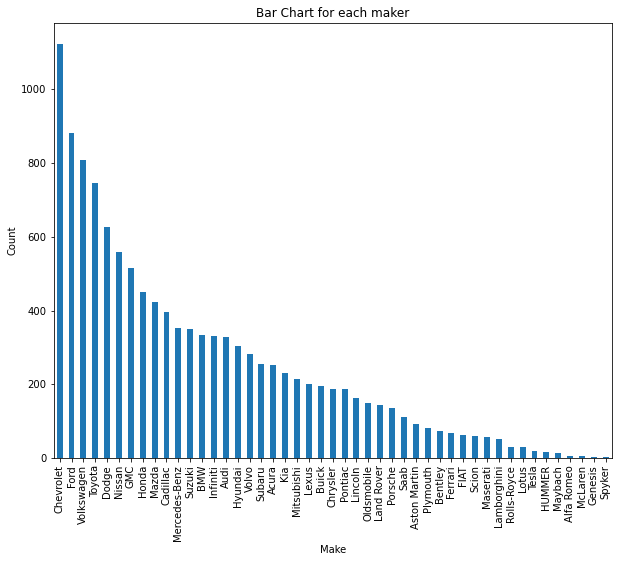

In [4]:
# Bar chart for frequency of each maker

# Bar Chart 3D (IN) function in ATH Leaps

plt.rcParams["figure.figsize"] = (10,8)
main_data['Make'].value_counts().plot(kind = 'bar')

#Adding title and labels
plt.title('Bar Chart for each maker')
plt.xlabel('Make')
plt.ylabel('Count')

plt.show()

## Histogram for Cylinder Number - Wise Distribution

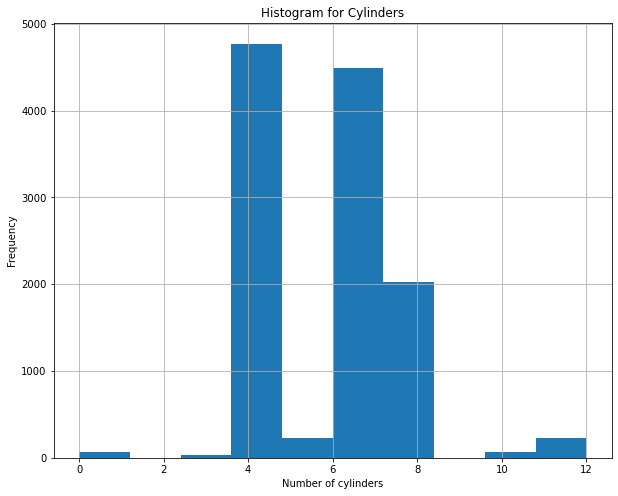

In [5]:
# Histogram of features

# Histogram Plot (Py) function in ATH Leaps

cats = ['Cylinders', 'HorsePower', 'Number_of_Doors']
plt.xlabel('Number of cylinders')
plt.ylabel('Frequency')
plt.title('Histogram for Cylinders')
main_data['Cylinders'].hist()
plt.show()

## Histogram for Horse Power Distribution

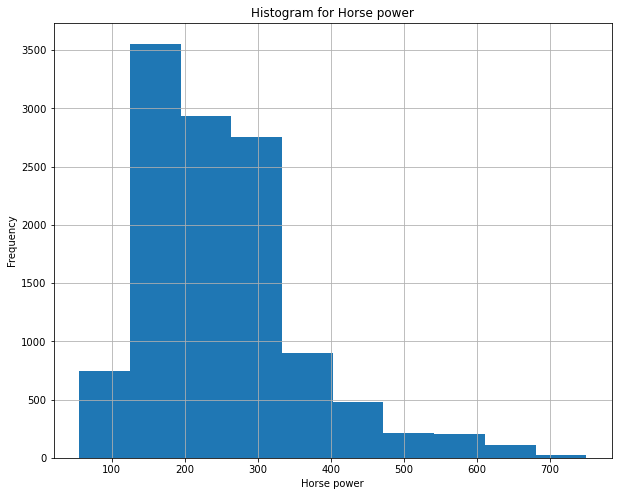

In [6]:
# Histogram for horse power

plt.xlabel('Horse power')
plt.ylabel('Frequency')
plt.title('Histogram for Horse power')
main_data['HorsePower'].hist()
plt.show()

## Histogram for Distribution based on Number of Doors

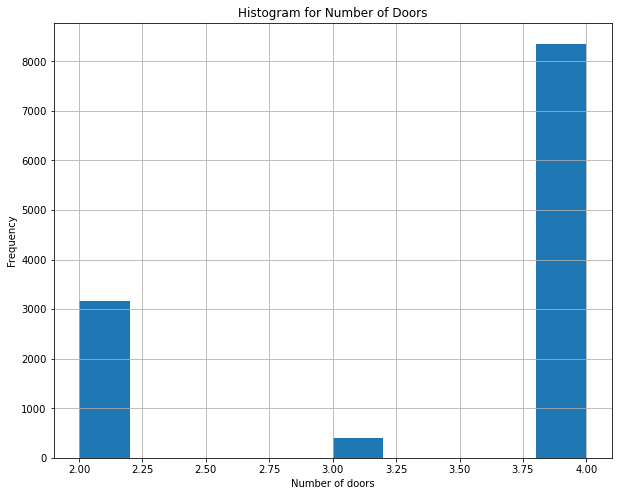

In [7]:
# Histogram for number of doors

plt.xlabel('Number of doors')
plt.ylabel('Frequency')
plt.title('Histogram for Number of Doors')
main_data['Number_of_Doors'].hist()
plt.show()

## Pie Chart for Distribution of Transmission Type

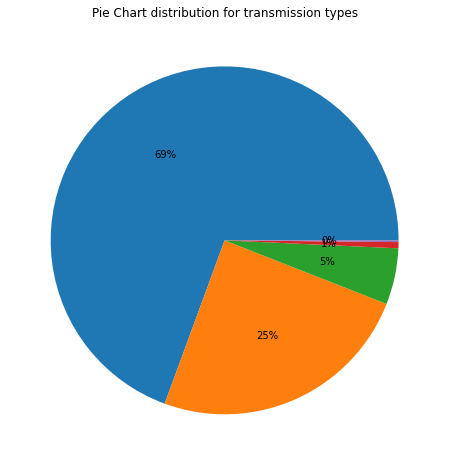

In [8]:
# Pie chart for frequency of transmission type

# Pue Chart (IN) function in ATH Leaps

plt.title('Pie Chart distribution for transmission types')
plt.pie(main_data['Transmission_Type'].value_counts(), autopct='%1.0f%%')
plt.show()

## Computing the Average Horsepower for Each Make

In [9]:
# Average horsepower in each maker

# Roll Up function in ATH Leaps

avg_hp = main_data.groupby('Make')['HorsePower'].mean().to_frame().reset_index()
avg_hp

,Make,HorsePower
0,Acura,244.797619
1,Alfa Romeo,237.000000
2,Aston Martin,484.322581
3,Audi,277.695122
4,BMW,326.907186
5,Bentley,533.851351
6,Buick,219.244898
7,Cadillac,332.309824
8,Chevrolet,246.983081
9,Chrysler,229.139037


## Bar Chart for Average Horsepower of Each Maker

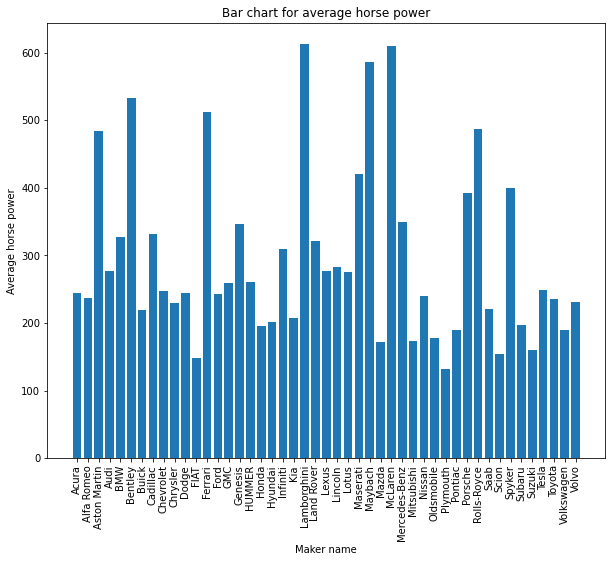

In [10]:
# Bar Chart for average horsepower

# Bar Chart 3D (IN) function in ATH Leaps

plt.xlabel('Maker name')
plt.ylabel('Average horse power')
plt.xticks(rotation=90)
plt.title('Bar chart for average horse power')
temp = main_data.groupby('Make')['HorsePower'].mean()
plt.bar(x = temp.index, height = temp.values)
plt.show()

## Computing the Year - Wise Distribution According to Each Make

In [11]:
# Number of cars year wise for makes

# Roll Up function in ATH Leaps

car_sell = main_data.groupby('Make')['Year'].count().to_frame().reset_index()
car_sell

,Make,Year
0,Acura,252
1,Alfa Romeo,5
2,Aston Martin,93
3,Audi,328
4,BMW,334
5,Bentley,74
6,Buick,196
7,Cadillac,397
8,Chevrolet,1123
9,Chrysler,187


## # Bar Chart for Number of Sells of Maker

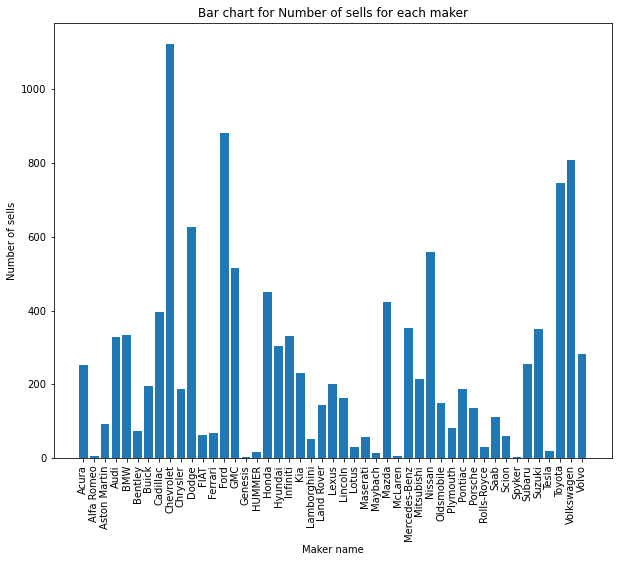

In [12]:
# Bar Chart for number of sells

# Bar Chart 3D (IN) function in ATH Leaps

plt.xlabel('Maker name')
plt.ylabel('Number of sells')
plt.xticks(rotation=90)
plt.title('Bar chart for Number of sells for each maker')
temp = main_data.groupby('Make')['Year'].count()
plt.bar(x = temp.index, height = temp.values)
plt.show()

## Box Plot Distribution of MSRP by Cylinders

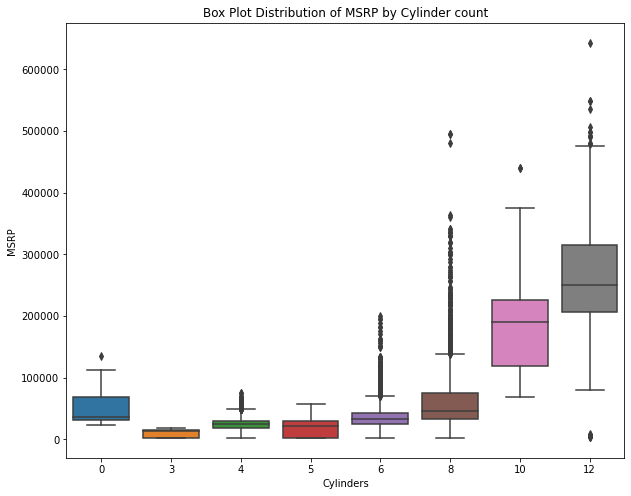

In [13]:
# Box plot of MSRP distribution by number of cylinders

# Box Plot by Group function in ATH Leaps

plt.title('Box Plot Distribution of MSRP by Cylinder count')
sns.boxplot(x = main_data['Cylinders'], y= main_data['MSRP'])
plt.show()

## Correlation Heatmap of Numerical Features

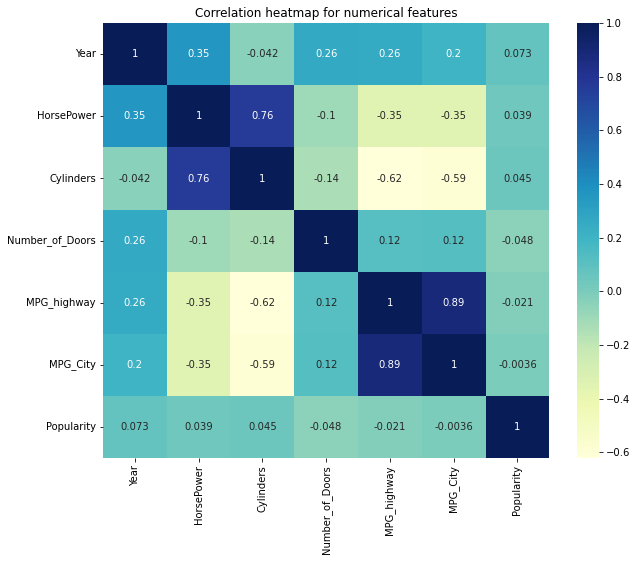

In [14]:
# Correlation heatmap of features

# Correlation Plot function in ATH Leaps

cols = ['Year', 'HorsePower', 'Cylinders', 'Number_of_Doors', 'MPG_highway', 'MPG_City', 'Popularity']
plt.title('Correlation heatmap for numerical features')
sns.heatmap(main_data[cols].corr(),cmap="YlGnBu", annot=True)
plt.show()

## Checking for Missing Values

In [15]:
# Checking for null values


display(main_data.isnull().sum())

Make                    0
Model                   0
Year                    0
Fuel_Type               3
HorsePower              0
Cylinders               0
Transmission_Type       0
Wheels_Driven           0
Number_of_Doors         0
Market_Segment       3742
Vehicle_Size            0
Vehicle_Type            0
MPG_highway             0
MPG_City                0
Popularity              0
MSRP                    0
dtype: int64

## Treatment of Missing Values

In [16]:
# Filling missing values

# Treat Missing By function in ATH Leaps

main_data['Fuel_Type'] =  main_data['Fuel_Type'].fillna(main_data['Fuel_Type'].mode())
main_data['Market_Segment'] =  main_data['Market_Segment'].fillna(main_data['Market_Segment'].mode())
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11908 entries, 0 to 11907
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11908 non-null  object
 1   Model              11908 non-null  object
 2   Year               11908 non-null  int64 
 3   Fuel_Type          11905 non-null  object
 4   HorsePower         11908 non-null  int64 
 5   Cylinders          11908 non-null  int64 
 6   Transmission_Type  11908 non-null  object
 7   Wheels_Driven      11908 non-null  object
 8   Number_of_Doors    11908 non-null  int64 
 9   Market_Segment     8166 non-null   object
 10  Vehicle_Size       11908 non-null  object
 11  Vehicle_Type       11908 non-null  object
 12  MPG_highway        11908 non-null  int64 
 13  MPG_City           11908 non-null  int64 
 14  Popularity         11908 non-null  int64 
 15  MSRP               11908 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.5

## Checking for Outliers

In [17]:
# Check for outliers

# Check Outliers function in ATH Leaps

n_total = main_data.shape[0]
cols = ['HorsePower', 'Cylinders', 'Number_of_Doors',  'MPG_highway', 'MPG_City', 'Popularity']

df_out = pd.DataFrame(columns = ['Selected_Column', 'No_of_Outliers', 'No_of_Values', 'Outlier_Proportion'])

for col in cols:
  quartile_1, quartile_3 = np.percentile(main_data[col], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_bound = quartile_1 - (iqr * 1.5)
  upper_bound = quartile_3 + (iqr * 1.5)
  temp = main_data[(main_data[col] < lower_bound) | (main_data[col]> upper_bound)]
  n_outliers = temp.shape[0]
  outlier_prop = round((n_outliers/n_total)*100,2)
  df_out = df_out.append({'Selected_Column': col, 'No_of_Outliers': n_outliers, 'No_of_Values': n_total, 'Outlier_Proportion': outlier_prop}, ignore_index = True)

df_out

,Selected_Column,No_of_Outliers,No_of_Values,Outlier_Proportion
0,HorsePower,503,11908,4.22
1,Cylinders,361,11908,3.03
2,Number_of_Doors,0,11908,0.00
3,MPG_highway,192,11908,1.61
4,MPG_City,316,11908,2.65
5,Popularity,881,11908,7.40


## Treatment of Outliers

In [18]:
# Treating outliers

# Treat Outliers By function in ATH Leaps

cols = ['HorsePower', 'Cylinders', 'Number_of_Doors',  'MPG_highway', 'MPG_City', 'Popularity']

df_treat_out = pd.DataFrame(columns = ['UpperBound', 'LowerBound'])
upp_bound = []
low_bound = []
for col in cols:
  q1, q3 = np.percentile(main_data[col], [25, 75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  c1 = main_data[col] < lower_bound
  c2 = main_data[col] > upper_bound
  main_data.loc[c1, col] = lower_bound
  main_data.loc[c2, col] = upper_bound
  upp_bound.append(upper_bound)
  low_bound.append(lower_bound)


for i in range(0, len(cols)):
  row = 0
  df_treat_out.loc[df_treat_out.shape[row]] = [upp_bound[i], low_bound[i]]
  row += 1

df_treat_out.index = cols
df_treat_out


,UpperBound,LowerBound
HorsePower,495.0,-25.0
Cylinders,9.0,1.0
Number_of_Doors,7.0,-1.0
MPG_highway,42.0,10.0
MPG_City,31.0,7.0
Popularity,4199.0,-1641.0


## Categorical Encoding

In [19]:
# Creating dummy variables for categorical features

# Dummy Variable function in ATH Leaps

cols = ['Fuel_Type', 'Transmission_Type', 'Vehicle_Type', 'Vehicle_Size', 'Wheels_Driven']
main_data = pd.get_dummies(data = main_data, columns = cols)

In [20]:
# Drop specific columns

# Delete Column(s) function in ATH Leaps

main_data.drop(['Make', 'Model', 'Market_Segment'],axis=1, inplace = True)

## Removing Multicollinearity Using Variance Inflation Factor

In [21]:
# Calculating VIF - 1

# Variance Inflation Factor (VIF) function in ATH Leaps

# the independent variables set
X = main_data[['Year', 'HorsePower', 'Cylinders','Number_of_Doors', 'MPG_highway', 'MPG_City', 'Popularity']]
  
# VIF main_dataframe
vif_main_data = pd.DataFrame()
vif_main_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_main_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_main_data                         

,feature,VIF
0,Year,147.183502
1,HorsePower,17.912226
2,Cylinders,54.579485
3,Number_of_Doors,16.756187
4,MPG_highway,196.667393
5,MPG_City,202.031048
6,Popularity,2.591573


In [22]:
# Calculating VIF - 2

# Variance Inflation Factor (VIF) function in ATH Leaps

# the independent variables set
X = main_data[['Year', 'HorsePower', 'Cylinders','Number_of_Doors', 'MPG_highway', 'MPG_City']]
  
# VIF main_dataframe
vif_main_data = pd.DataFrame()
vif_main_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_main_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_main_data 

,feature,VIF
0,Year,146.656815
1,HorsePower,17.905643
2,Cylinders,54.436467
3,Number_of_Doors,16.704684
4,MPG_highway,196.593651
5,MPG_City,201.676559


In [23]:
# Calculating VIF - 3

# Variance Inflation Factor (VIF) function in ATH Leaps

# the independent variables set
X = main_data[['Year', 'HorsePower', 'Number_of_Doors', 'MPG_highway', 'MPG_City']]
  
# VIF main_dataframe
vif_main_data = pd.DataFrame()
vif_main_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_main_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_main_data 

,feature,VIF
0,Year,63.203808
1,HorsePower,11.674949
2,Number_of_Doors,16.700777
3,MPG_highway,193.568161
4,MPG_City,194.456904


## Splitting Data into Train and Test Data

In [24]:
# Forming train and test data

# Split Data (Py) function in ATH Leaps

y = main_data['MSRP']
X = main_data.drop('MSRP', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Modelling

## Implementing the Model

In [25]:
# Training three regression models

# Train Regression Models function in ATH Leaps

# Lnear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree regressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# random Forest regressor

rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

## Predictions Using Linear Regression

In [26]:
# Predicting on test data - linear regression

# Apply ML Algorithm (Py) function in ATH Leaps

lr_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2_sc = r2_score(y_test, lr_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)

Mean absolute error:  16803.849860928472 
Root Mean Squared Error:  32557.077201376756 
R2 score:  0.571822129329733


## Predictions Using Decision Tree Regression

In [27]:
# Predicting on test data - decision tree regression

# Apply ML Algorithm (Py) function in ATH Leaps

dt_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, dt_pred)
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
r2_sc = r2_score(y_test, dt_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)

Mean absolute error:  3849.3749149263213 
Root Mean Squared Error:  8601.806251414615 
R2 score:  0.9701109086903557


## Predictions Using Random Forest Regression

In [28]:
# Predicting on test data - random forest regression

# Apply ML Algorithm (Py) function in ATH Leaps

rf_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2_sc = r2_score(y_test, rf_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)

Mean absolute error:  3669.6151783924097 
Root Mean Squared Error:  8205.421066911922 
R2 score:  0.9728021143474863


## Scatter Plot of True Values and Linear Regression Predictions

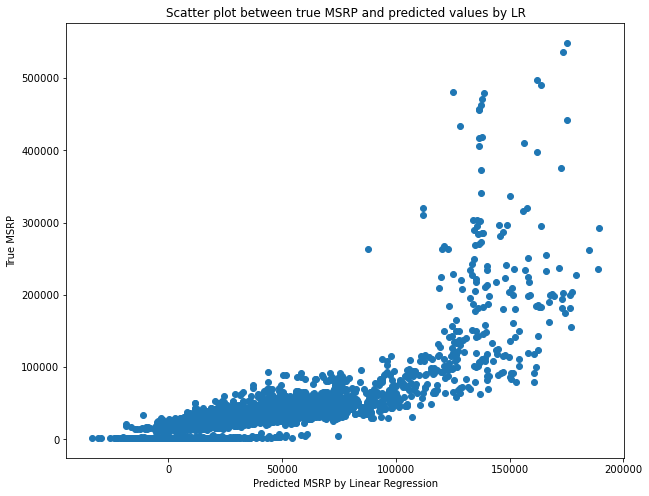

In [29]:
# Scatter plot to compare predictions with test data

# Scatter Plot Fit Line (Py) function in ATH Leaps

plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Linear Regression')
plt.scatter(lr_pred, y_test)
plt.title('Scatter plot between true MSRP and predicted values by LR')
plt.show()

## Scatter Plot of True Values and Decision Tree Regression Predictions

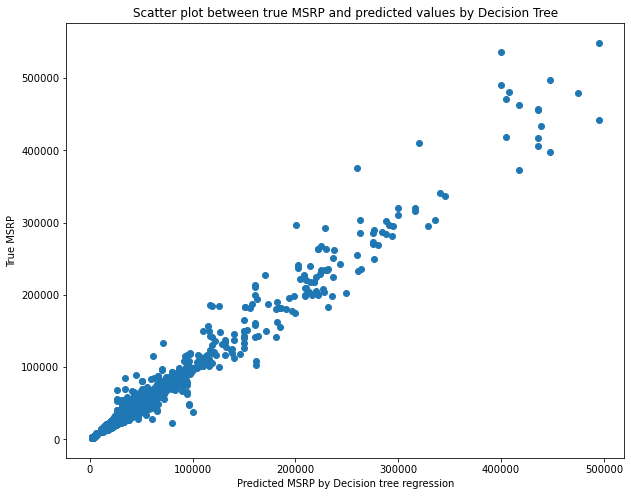

In [30]:
# Scatter plot for true MSRP and predicted MSRP by Decision tree

plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Decision tree regression')
plt.scatter(dt_pred, y_test)
plt.title('Scatter plot between true MSRP and predicted values by Decision Tree')
plt.show()

## Scatter Plot of True Values and Random Forest Regression Predictions

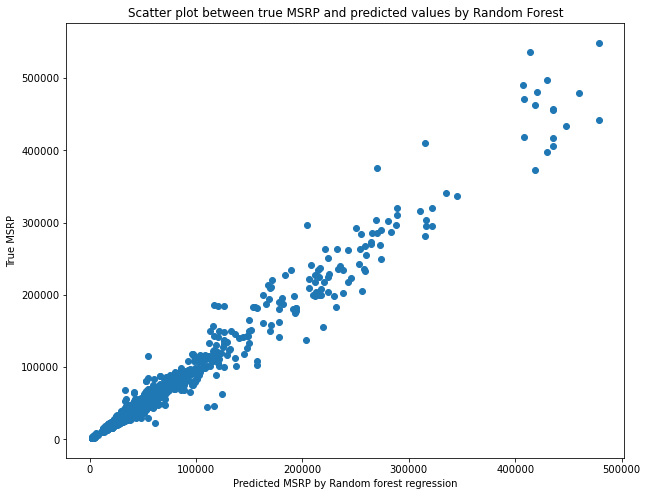

In [31]:
# Scatter plot for true MSRP and predicted MSRP by Random Forest Regression

plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Random forest regression')
plt.scatter(rf_pred, y_test)
plt.title('Scatter plot between true MSRP and predicted values by Random Forest')
plt.show()